In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from causallearn.search.ConstraintBased.FCI import fci
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
import pydot

import io
import matplotlib.image as mpimg

/home/zj448/miniconda3/envs/causal/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df=pd.read_csv('marsset_data_full.csv')
df

,number,class,Hr,a,e,inc,c,deltac,class2
0,1,cla,6.85,43.72,0.05,7.75,22.23,6.16,cla
1,2,cla,7.17,43.86,0.10,31.67,20.64,9.66,cla
2,3,cla,6.23,43.89,0.13,7.35,31.62,10.39,cla
3,4,cla,7.45,42.18,0.05,8.03,31.50,2.50,cla
4,5,cla,7.28,42.70,0.08,13.19,29.57,9.68,cla
...,...,...,...,...,...,...,...,...,...
224,225,det,7.22,61.79,0.39,5.79,9.88,2.29,det
225,226,det,7.25,55.30,0.29,22.46,16.60,2.33,det
226,227,det,7.20,46.16,0.49,44.89,14.30,0.80,det
227,228,det,6.42,150.15,0.73,33.54,18.50,1.00,det


In [6]:
classes=np.unique(df['class2'])
classes

array(['cen', 'cla', 'det', 'res', 'sca'], dtype=object)

In [21]:
rename_dict = {'cen':'Centaurs','cla':'Classicals','det':'Detached','res':'Resonant','sca':'Scattered'}
df['class2'] = df['class2'].replace(rename_dict)
classes=np.unique(df['class2'])

In [7]:
df=df[['a','e','inc','c','class2']]

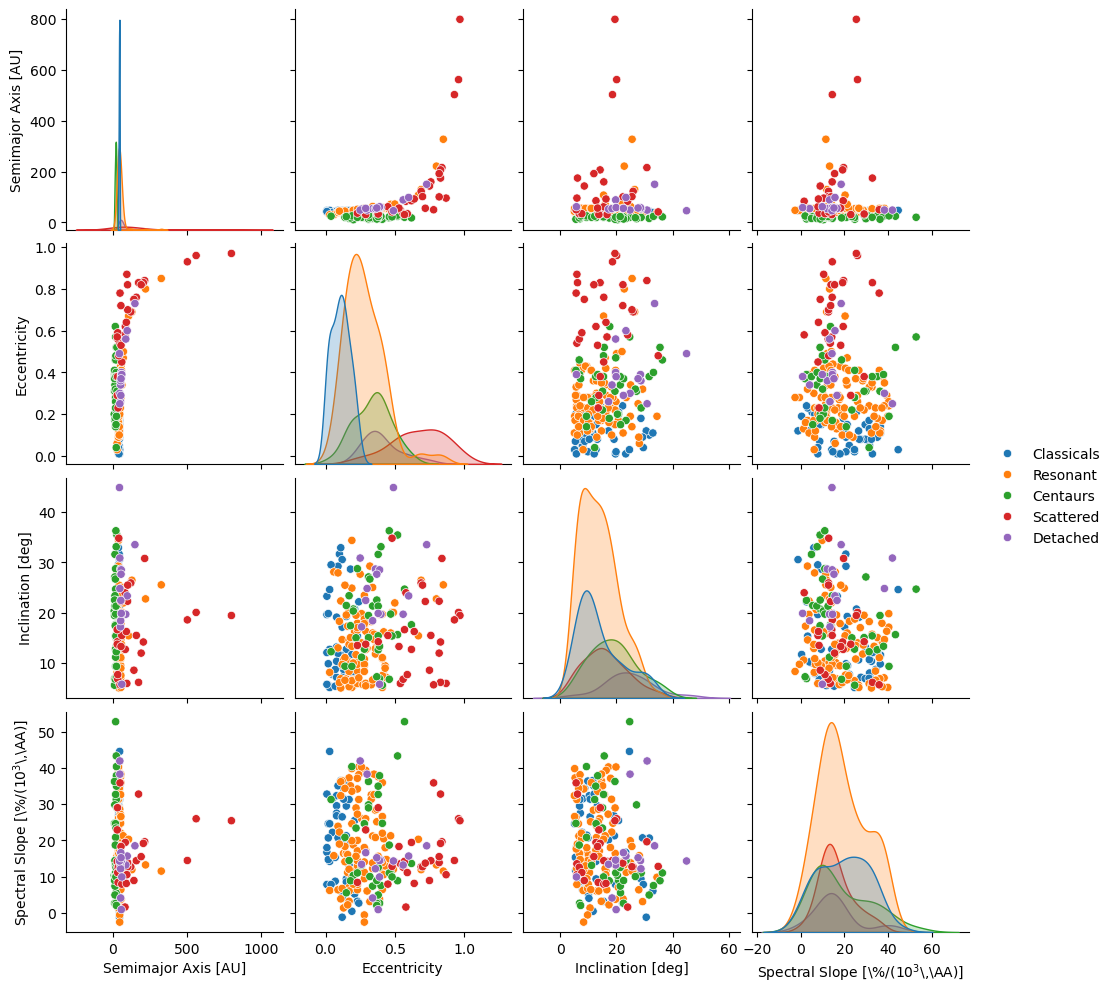

In [14]:
scatter_labels = ['Semimajor Axis [AU]', 'Eccentricity', 'Inclination [deg]', r'Spectral Slope [\%/(10$^3$\,\AA)]']

pairplot = sns.pairplot(df, hue="class2", diag_kind='kde', palette="tab10")

# Remove the legend title
pairplot._legend.set_title(None)

# Change the y-axis labels
for i, label in enumerate(scatter_labels):
    pairplot.axes[i, 0].set_ylabel(label)

# Change the x-axis labels
for i, label in enumerate(scatter_labels):
    pairplot.axes[-1, i].set_xlabel(label)
plt.show()

In [16]:
labels_list = [r'$\text{a}$',r'$\text{e}$', r'$\text{inc}$', r'$\text{color}$']

In [72]:
def causallearn_to_pydot(g,title=None,fontsize=25,dpi=500,latex_fontsize='xx-large',render_latex=True,labels_list=labels_list):

    # Render LaTeX to an image
    def render_latex_to_file(str, filepath):
        fig = plt.figure()
        fig = plt.figure(figsize=(0.01, 0.01))
        fig.text(0, 0, str, fontsize=latex_fontsize, ha='center', va='center')
        plt.axis('off')
        plt.savefig(filepath, bbox_inches='tight')
        plt.close(fig)

    if render_latex:
        for i,string in enumerate(labels_list):
            render_latex_to_file(string,'labels/label'+str(i)+'.png')

    #
    nodes = g.get_nodes()
    edges = g.get_graph_edges()

    pydot_g = pydot.Dot(graph_type="digraph")
    if dpi!=None:
        pydot_g.obj_dict["attributes"]["dpi"] = dpi

    for i, node in enumerate(nodes):
        node_name = node.get_name()
        pydot_g.add_node(pydot.Node(i, image='/home/zj448/causalTNOs/labels/label'+str(i)+'.png'
                                    ,label=""))

    def get_g_arrow_type(endpoint):
        if endpoint == Endpoint.TAIL:
            return 'none'
        elif endpoint == Endpoint.ARROW:
            return 'normal'
        elif endpoint == Endpoint.CIRCLE:
            return 'odot'
        else:
            raise NotImplementedError()
        
    for edge in edges:
        node1 = edge.get_node1()
        node2 = edge.get_node2()
        node1_id = nodes.index(node1)
        node2_id = nodes.index(node2)
        dot_edge = pydot.Edge(node1_id, node2_id, dir='both', arrowtail=get_g_arrow_type(edge.get_endpoint1()),
                                arrowhead=get_g_arrow_type(edge.get_endpoint2()))

        if Edge.Property.dd in edge.properties:
            dot_edge.obj_dict["attributes"]["color"] = "green3"

        if Edge.Property.nl in edge.properties:
            dot_edge.obj_dict["attributes"]["penwidth"] = 2.0

        pydot_g.add_edge(dot_edge)

    if title!=None:
        pydot_g.set_label(title)
        pydot_g.set_labelloc('t')
    pydot_g.set_fontsize(fontsize)
    pydot_g.set_fontname('Calibri')
    return pydot_g

# Untransformed, Fisher-z

Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 662.35it/s]


0 dep 1 | () with p-value 0.000000

0 ind 2 | () with p-value 0.143803

0 ind 3 | () with p-value 0.918242

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.005290

1 ind 3 | () with p-value 0.211388

2 ind 0 | () with p-value 0.143803

2 dep 1 | () with p-value 0.005290

2 dep 3 | () with p-value 0.001430

3 ind 0 | () with p-value 0.918242

3 ind 1 | () with p-value 0.211388

3 dep 2 | () with p-value 0.001430

1 dep 0 | (2,) with p-value 0.000000

1 dep 2 | (0,) with p-value 0.017642

2 dep 1 | (3,) with p-value 0.009840

2 dep 3 | (1,) with p-value 0.002643

Orienting collider: X1 *-> X2 <-* X3
Orienting collider: X2 *-> X3 <-* X4
Orienting collider: X1 *-> X2 <-* X3
Orienting collider: X2 *-> X3 <-* X4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

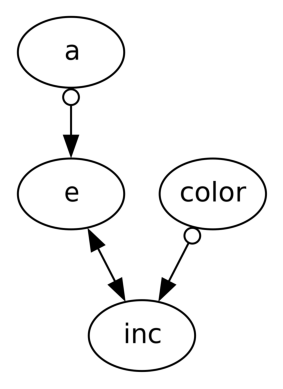

In [73]:
alpha=0.02
g, edges = fci(np.array(df[['a','e','inc','c']]),'fisherz',alpha=alpha,verbose=True,uc_rule=2)
pyd=causallearn_to_pydot(g,render_latex=True,dpi=500,latex_fontsize=70,labels_list=labels_list)

tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Untransformed, KCI

Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 277.03it/s]


0 dep 1 | () with p-value 0.000000

0 ind 2 | () with p-value 0.420744

0 ind 3 | () with p-value 0.488043

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.085105

1 ind 3 | () with p-value 0.135326

2 ind 0 | () with p-value 0.420744

2 dep 1 | () with p-value 0.085105

2 dep 3 | () with p-value 0.009405

3 ind 0 | () with p-value 0.488043

3 ind 1 | () with p-value 0.135326

3 dep 2 | () with p-value 0.009405

1 dep 0 | (2,) with p-value 0.067835

1 dep 2 | (0,) with p-value 0.070081

2 dep 1 | (3,) with p-value 0.040643

2 dep 3 | (1,) with p-value 0.004260

Orienting collider: X1 *-> X2 <-* X3
Orienting collider: X2 *-> X3 <-* X4
Orienting collider: X1 *-> X2 <-* X3
Orienting collider: X2 *-> X3 <-* X4


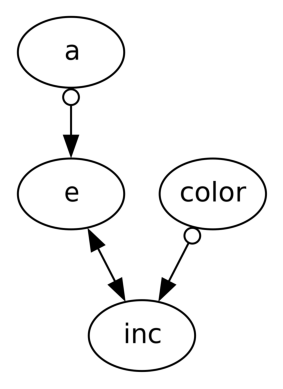

In [74]:
alpha=0.09
g, edges = fci(np.array(df[['a','e','inc','c']]),'kci',polyd=2, kernelX='Polynomial', kernelY='Polynomial', kernelZ='Polynomial',alpha=alpha,verbose=True,uc_rule=2)
pyd=causallearn_to_pydot(g,render_latex=False,dpi=500,latex_fontsize=70,labels_list=labels_list)

tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Leave one out for each population

Without Centaurs sample_size: 193 alpha: 0.02


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 717.50it/s]


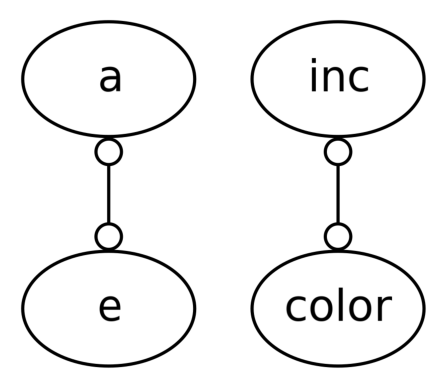

Without Classicals sample_size: 181 alpha: 0.05


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 645.45it/s]


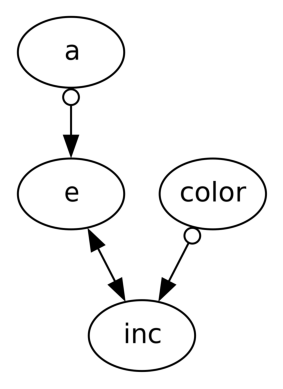

Without Detached sample_size: 214 alpha: 0.09


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 685.68it/s]


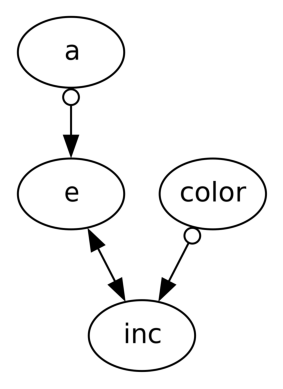

Without Resonant sample_size: 127 alpha: 0.11


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 718.45it/s]


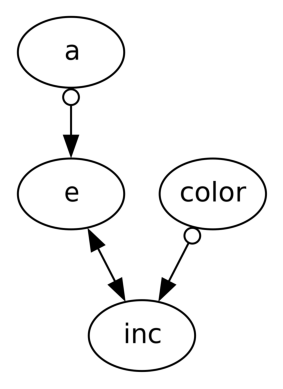

Without Scattered sample_size: 201 alpha: 0.01


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 639.16it/s]


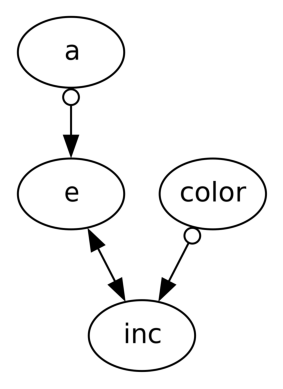

In [68]:
alpha=[0.02,0.05,0.09,0.11,0.01]
for i,class2 in enumerate(classes):
    print('Without',class2,'sample_size:',len(df[df['class2']!=class2]),'alpha:',alpha[i])
    df_no_res = df[df['class2']!=class2][['a','e','inc','c']]
    g, edges = fci(np.array(df_no_res),'fisherz',alpha=alpha[i],verbose=False,uc_rule=2)
    pyd=causallearn_to_pydot(g,render_latex=False,dpi=500,latex_fontsize=70,labels_list=labels_list)

    tmp_png = pyd.create_png(f="png")
    fp = io.BytesIO(tmp_png)
    img = mpimg.imread(fp, format='png')
    plt.axis('off')
    plt.imshow(img)
    plt.show()

# Sub-populations

Class: Centaurs sample_size: 0 alpha: 0.3


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 650.73it/s]

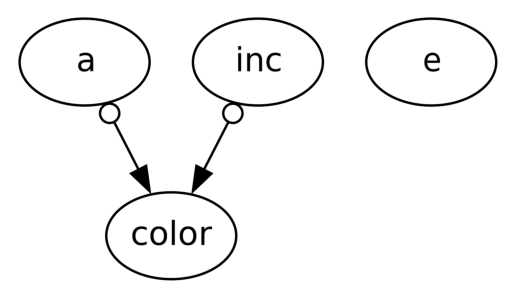

Class: Classicals sample_size: 0 alpha: 0.05


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 688.72it/s]


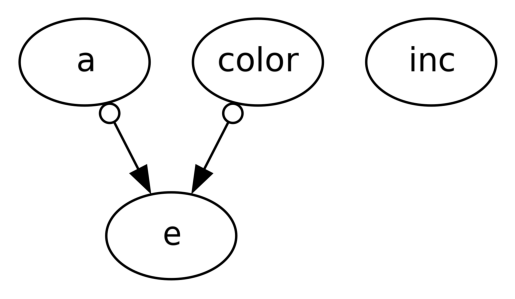

Class: Detached sample_size: 0 alpha: 0.4


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 753.63it/s]


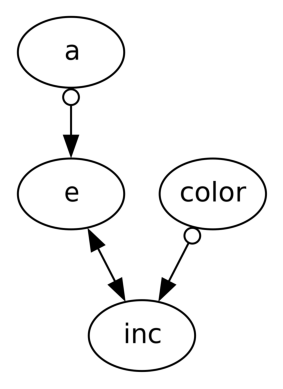

Class: Resonant sample_size: 0 alpha: 0.05


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 734.68it/s]


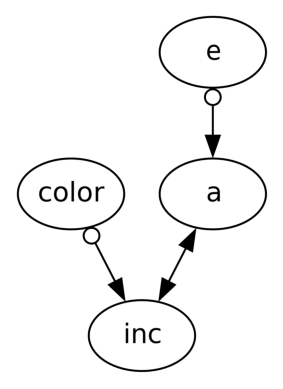

Class: Scattered sample_size: 0 alpha: 0.2


Depth=0, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 734.49it/s]


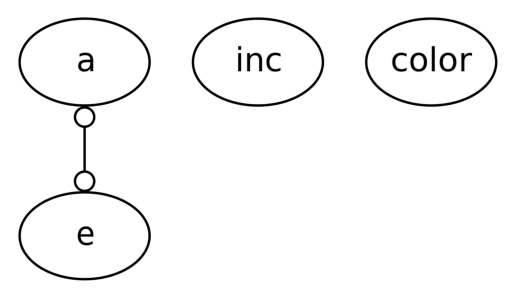

In [30]:
alpha=[0.3,0.05,0.4,0.05,0.2]
for i,class2 in enumerate(classes):
    print('Class:',class2,'sample_size:',len(df[df['class2']==label]),'alpha:',alpha[i])
    df_class = df[df['class2']==class2][['a','e','inc','c']]
    g, edges = fci(np.array(df_class),'fisherz',alpha=alpha[i],verbose=False,uc_rule=2)
    pyd=causallearn_to_pydot(g,render_latex=False,dpi=500,latex_fontsize=70,labels_list=labels_list)

    tmp_png = pyd.create_png(f="png")
    fp = io.BytesIO(tmp_png)
    img = mpimg.imread(fp, format='png')
    plt.axis('off')
    plt.imshow(img)
    plt.show()